<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Paul_selfstudy9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 5

In [0]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

#
# functions for working with vectors
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

#
# functions for working with matrices
#

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

#          user 0  1  2  3  4  5  6  7  8  9
#
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

#####
# DELETE DOWN
#


def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)


def make_graph_dot_product_as_vector_projection(plt):

    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1],
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1],
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis('equal')
plt.show()

In [0]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

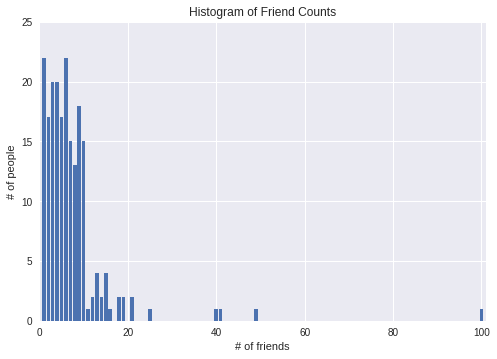

In [0]:
import collections
import matplotlib.pyplot as plt

friend_counts = collections.Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [0]:
num_points = len(num_friends)
num_points

204

In [0]:
largest_value = max(num_friends) 
smallest_value = min(num_friends)

In [0]:
largest_value

100

In [0]:
smallest_value

1

In [0]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] 
second_smallest_value = sorted_values[1] 
second_largest_value = sorted_values[-2]

In [0]:
second_smallest_value

1

In [0]:
def mean(x):
  return sum(x) / len(x)
mean(num_friends)

7.333333333333333

In [0]:
def median(v):
  """finds the 'middle-most' value of v"""
  n = len(v)
  sorted_v = sorted(v)
  midpoint = n // 2
  if n % 2 == 1:
    return sorted_v[midpoint]
  else:
    lo = midpoint - 1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends)

6.0

In [0]:
def quantile(x, p):
  """returns the pth-percentile value in x"""
  p_index = int(p * len(x))
  return sorted(x)[p_index]

In [0]:
quantile(num_friends, 0.10)

1

In [0]:
quantile(num_friends, 0.25)

3

In [0]:
quantile(num_friends, 0.75)

9

In [0]:
quantile(num_friends, 0.90)

13

In [0]:
import collections

def mode(x):
  """returns a list, might be more than one mode"""
  counts = collections.Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items()
          if count == max_count]
mode(num_friends)

[6, 1]

In [0]:
def data_range(x):
  return max(x) - min(x)
data_range(num_friends)

99

In [0]:
def de_mean(x):
  """translate x by subtracting its mean (so the result has mean 0)"""
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]

In [0]:
de_mean(num_friends)

[92.66666666666667,
 41.666666666666664,
 33.666666666666664,
 32.666666666666664,
 17.666666666666668,
 13.666666666666668,
 13.666666666666668,
 11.666666666666668,
 11.666666666666668,
 10.666666666666668,
 10.666666666666668,
 8.666666666666668,
 7.666666666666667,
 7.666666666666667,
 7.666666666666667,
 7.666666666666667,
 6.666666666666667,
 6.666666666666667,
 5.666666666666667,
 5.666666666666667,
 5.666666666666667,
 5.666666666666667,
 4.666666666666667,
 4.666666666666667,
 3.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 2.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.666666666666667,
 1.6666666

In [0]:
def variance(x):
  """assumes x has at least two elements"""
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)
variance(num_friends) # 81.54

81.54351395730716

In [0]:
import math

def standard_deviation(x):
  return math.sqrt(variance(x))
standard_deviation(num_friends)

9.03014473623248

In [0]:
def interquartile_range(x):
  return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends)

6

In [0]:
####
#
# CORRELATION
#
#####

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [0]:
def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)
covariance(num_friends, daily_minutes)

22.425435139573064

In [0]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [0]:
outlier = num_friends.index(100)

In [0]:
 num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]
correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

In [0]:
    print("num_points", len(num_friends))
    print("largest value", max(num_friends))
    print("smallest value", min(num_friends))
    print("second_smallest_value", sorted_values[1])
    print("second_largest_value", sorted_values[-2]  )
    print("mean(num_friends)", mean(num_friends))
    print("median(num_friends)", median(num_friends))
    print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
    print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
    print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
    print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
    print("mode(num_friends)", mode(num_friends))
    print("data_range(num_friends)", data_range(num_friends))
    print("variance(num_friends)", variance(num_friends))
    print("standard_deviation(num_friends)", standard_deviation(num_friends))
    print("interquartile_range(num_friends)", interquartile_range(num_friends))

    print("covariance(num_friends, daily_minutes)", covariance(num_friends, daily_minutes))
    print("correlation(num_friends, daily_minutes)", correlation(num_friends, daily_minutes))
    print("correlation(num_friends_good, daily_minutes_good)", correlation(num_friends_good, daily_minutes_good))

num_points 204
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49
mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13
mode(num_friends) [6, 1]
data_range(num_friends) 99
variance(num_friends) 81.54351395730716
standard_deviation(num_friends) 9.03014473623248
interquartile_range(num_friends) 6
covariance(num_friends, daily_minutes) 22.425435139573064
correlation(num_friends, daily_minutes) 0.24736957366478218
correlation(num_friends_good, daily_minutes_good) 0.5736792115665573


Chapter 6

In [0]:
import random

def random_kid():
  return random.choice(["boy", "girl"])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
  younger = random_kid()
  older = random_kid()
  if older == "girl":
    older_girl += 1
    if older == "girl" and younger == "girl":
      both_girls += 1
      if older == "girl" or younger == "girl":
        either_girl += 1
print ("P(both | older):" , both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  1.0


In [0]:
def uniform_pdf(x):
  return 1 if x >= 0 and x < 1 else 0

In [0]:
def uniform_cdf(x):
  "returns the probability that a uniform random variable is <= x"
  if x < 0: return 0 # uniform random is never less than 0
  elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
  else: return 1 # uniform random is always less than 1

In [0]:
def normal_pdf(x, mu=0, sigma=1):
  sqrt_two_pi = math.sqrt(2 * math.pi)
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

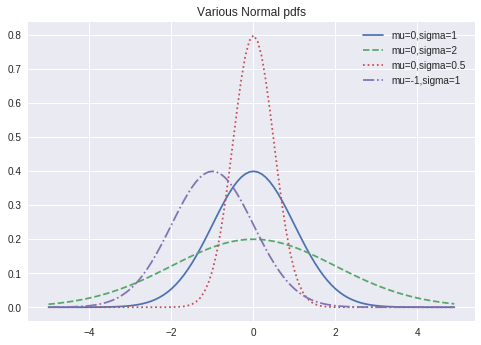

In [0]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [0]:
def normal_cdf(x, mu=0,sigma=1):
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

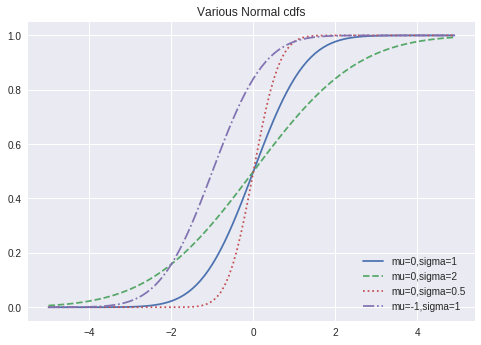

In [0]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [0]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
  """find approximate inverse using binary search"""
  if mu != 0 or sigma != 1:
    return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
  low_z = -10.0 # normal_cdf(-10) is (very close to) 0
  hi_z = 10.0 # normal_cdf(10) is (very close to) 1
  while hi_z - low_z > tolerance:
    mid_z = (low_z + hi_z) / 2 # consider the midpoint
    mid_p = normal_cdf(mid_z) # and the cdf's value there
    if mid_p < p:
      low_z = mid_z
    elif mid_p > p:
      hi_z = mid_z
    else:
      break
  return mid_z

In [0]:
def bernoulli_trial(p):
  return 1 if random.random() < p else 0
def binomial(n, p):
  return sum(bernoulli_trial(p) for _ in range(n))

In [0]:
def make_hist(p, n, num_points):
  data = [binomial(n, p) for _ in range(num_points)]
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
          [v / num_points for v in histogram.values()],
          0.8,
          color='0.75')
  mu = p * n
  sigma = math.sqrt(n * p * (1 - p))
  xs = range(min(data), max(data) + 1)
  ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
  plt.plot(xs,ys)
  plt.title("Binomial Distribution vs. Normal Approximation")
  plt.show()

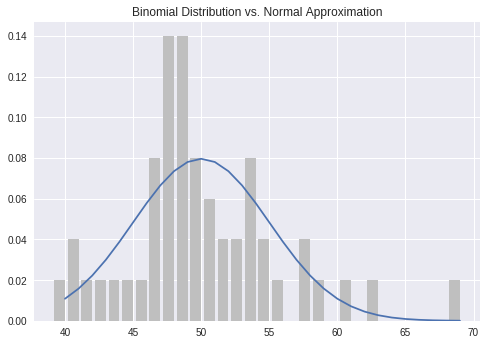

In [0]:
make_hist(0.5, 100, 50)

Chapter 7

In [0]:
def normal_approximation_to_binomial(n, p):
  """finds mu and sigma corresponding to a Binomial(n, p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [0]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

In [0]:
print("mu_0", mu_0)

mu_0 500.0


In [0]:
print("sigma_0", sigma_0)

sigma_0 15.811388300841896


In [0]:
#####
#
# probabilities a normal lies in an interval
#
######

# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

In [0]:
# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [0]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

In [0]:
print("lo", lo)

lo 469.01026640487555


In [0]:
print("hi", hi)

hi 530.9897335951244


In [0]:
def normal_upper_bound(probability, mu=0, sigma=1):
  """returns the z for which P(Z <= z) = probability"""
  return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
  """returns the z for which P(Z >= z) = probability"""
  return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
  """returns the symmetric (about the mean) bounds
  that contain the specified probability"""
  tail_probability = (1 - probability) / 2
  upper_bound = normal_lower_bound(tail_probability, mu, sigma)
  lower_bound = normal_upper_bound(tail_probability, mu, sigma)
  return lower_bound, upper_bound

In [0]:
print("mu_0", mu_0)

mu_0 500.0


In [0]:
print("sigma_0", sigma_0)

sigma_0 15.811388300841896


In [0]:
print("normal_two_sided_bounds(0.95, mu_0, sigma_0)", normal_two_sided_bounds(0.95, mu_0, sigma_0))

normal_two_sided_bounds(0.95, mu_0, sigma_0) (469.01026640487555, 530.9897335951244)


In [0]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)

In [0]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598857

In [0]:
if __name__ == "__main__":

    mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
    print("mu_0", mu_0)
    print("sigma_0", sigma_0)
    print("normal_two_sided_bounds(0.95, mu_0, sigma_0)", normal_two_sided_bounds(0.95, mu_0, sigma_0))
    print()
    print("power of a test")

    print("95% bounds based on assumption p is 0.5")

    lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
    print("lo", lo)
    print("hi", hi)

    print("actual mu and sigma based on p = 0.55")
    mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
    print("mu_1", mu_1)
    print("sigma_1", sigma_1)

    # a type 2 error means we fail to reject the null hypothesis
    # which will happen when X is still in our original interval
    type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
    power = 1 - type_2_probability # 0.887

    print("type 2 probability", type_2_probability)
    print("power", power)
    print

    print("one-sided test")
    hi = normal_upper_bound(0.95, mu_0, sigma_0)
    print("hi", hi) # is 526 (< 531, since we need more probability in the upper tail)
    type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
    power = 1 - type_2_probability # = 0.936
    print("type 2 probability", type_2_probability)
    print("power", power)
    print()

    print("two_sided_p_value(529.5, mu_0, sigma_0)", two_sided_p_value(529.5, mu_0, sigma_0))

    print("two_sided_p_value(531.5, mu_0, sigma_0)", two_sided_p_value(531.5, mu_0, sigma_0))

    print("upper_p_value(525, mu_0, sigma_0)", upper_p_value(525, mu_0, sigma_0))
    print("upper_p_value(527, mu_0, sigma_0)", upper_p_value(527, mu_0, sigma_0))
    print()

mu_0 500.0
sigma_0 15.811388300841896
normal_two_sided_bounds(0.95, mu_0, sigma_0) (469.01026640487555, 530.9897335951244)

power of a test
95% bounds based on assumption p is 0.5
lo 469.01026640487555
hi 530.9897335951244
actual mu and sigma based on p = 0.55
mu_1 550.0
sigma_1 15.732132722552274
type 2 probability 0.11345199870463285
power 0.8865480012953671
one-sided test
hi 526.0073585242053
type 2 probability 0.06362051966928273
power 0.9363794803307173

two_sided_p_value(529.5, mu_0, sigma_0) 0.06207721579598857
two_sided_p_value(531.5, mu_0, sigma_0) 0.046345287837786575
upper_p_value(525, mu_0, sigma_0) 0.056923149003329065
upper_p_value(527, mu_0, sigma_0) 0.04385251499101195



In [0]:
extreme_value_count = 0
for _ in range(100000):
  num_heads = sum(1 if random.random() < 0.5 else 0
                  for _ in range(1000))
  if num_heads >= 530 or num_heads <= 470:
    extreme_value_count += 1 
print (extreme_value_count / 100000)

0.0625


In [0]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [0]:
##
#
# P-hacking
#
##

def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531


##
#
# running an A/B test
#
##

def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

##
#
# Bayesian Inference
#
##

def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [0]:
if __name__ == "__main__":
    print()

    print("P-hacking")

    random.seed(0)
    experiments = [run_experiment() for _ in range(1000)]
    num_rejections = len([experiment
                          for experiment in experiments
                          if reject_fairness(experiment)])

    print(num_rejections, "rejections out of 1000")
    print()

    print("A/B testing")
    z = a_b_test_statistic(1000, 200, 1000, 180)
    print("a_b_test_statistic(1000, 200, 1000, 180)", z)
    print("p-value", two_sided_p_value(z))
    z = a_b_test_statistic(1000, 200, 1000, 150)
    print("a_b_test_statistic(1000, 200, 1000, 150)", z)
    print("p-value", two_sided_p_value(z))


P-hacking
46 rejections out of 1000

A/B testing
a_b_test_statistic(1000, 200, 1000, 180) -1.1403464899034472
p-value 0.254141976542236
a_b_test_statistic(1000, 200, 1000, 150) -2.948839123097944
p-value 0.003189699706216853
